In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load dataset

In [122]:
df = pd.read_excel('Online Retail.xlsx')

In [123]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
483016,577490,22493,PAINT YOUR OWN CANVAS SET,1,2011-11-20 12:11:00,1.65,16464.0,United Kingdom
226093,556778,23053,RECYCLED ACAPULCO MAT PINK,2,2011-06-14 12:41:00,8.25,16712.0,United Kingdom
301020,563231,84078A,SET/4 WHITE RETRO STORAGE CUBES,1,2011-08-14 15:42:00,39.95,14658.0,United Kingdom
356406,568050,22331,WOODLAND PARTY BAG + STICKER SET,1,2011-09-23 12:38:00,1.65,15901.0,United Kingdom
129776,547389,21145,ANTIQUE GLASS PLACE SETTING,24,2011-03-22 16:08:00,1.25,16721.0,United Kingdom
426925,573369,22228,BUNNY WOODEN PAINTED WITH BIRD,1,2011-10-30 13:19:00,0.39,16049.0,United Kingdom
34535,539404,22722,SET OF 6 SPICE TINS PANTRY DESIGN,2,2010-12-17 12:24:00,3.95,17315.0,United Kingdom
390321,570512,48184,DOORMAT ENGLISH ROSE,10,2011-10-11 10:31:00,7.08,14952.0,United Kingdom
78785,542898,20765,CHRYSANTHEMUM SKETCHBOOK,1,2011-02-01 14:01:00,3.75,16110.0,United Kingdom
37880,C539486,22336,DOVE DECORATION PAINTED ZINC,-23,2010-12-20 08:27:00,0.65,18256.0,United Kingdom


# 2. Exploring and Cleaning the data

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [125]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### 1. Check if there are any missing value

In [126]:
df.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

Text(0.5, 1.0, 'Ration of missing value')

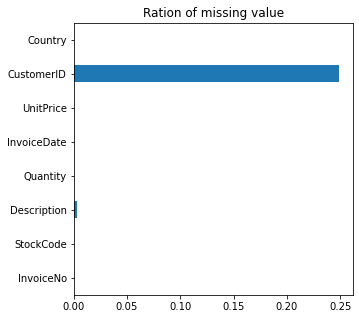

In [127]:
plt.figure(figsize = (5, 5)) 
df.isnull().mean(axis=0).plot.barh()
plt.title("Ration of missing value")

##### The missing values are only in the CustomerID column and the description column

#### 2. Check if any column have a single value

In [128]:
print(df.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


##### There are no single value in datasets

#### 3. Check if there are any missing value

In [129]:
duplicateRowsDF = df[df.duplicated()]

In [130]:
print("Duplicate Rows based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows based on all columns are :
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID        

##### There are 5268 duplicated coloumns

In [131]:
df.drop_duplicates(inplace = True)

In [132]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


#### Drop customer id since it not necessary for clustering and it contains many missing value

In [133]:
null_data = df[df['Description'].isnull()]
null_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [134]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 536641, dtype: object

#### Removing cancelled orders

In [135]:
x = df['InvoiceNo'].str.contains('C')
x.fillna(0, inplace=True)

In [136]:
x = x.astype(int)

In [137]:
x.value_counts()

0    527390
1      9251
Name: InvoiceNo, dtype: int64

In [138]:
df['order_canceled'] = x
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
288109,562131,22614,PACK OF 12 SPACEBOY TISSUES,48,2011-08-03 09:30:00,0.29,18178.0,United Kingdom,0
70190,541999,90214N,"LETTER ""N"" BLING KEY RING",1,2011-01-25 10:45:00,0.83,NaN,United Kingdom,0
201311,554280,22457,NATURAL SLATE HEART CHALKBOARD,6,2011-05-23 13:35:00,2.95,14817.0,United Kingdom,0
68488,541869,22716,CARD CIRCUS PARADE,2,2011-01-24 09:35:00,0.83,NaN,United Kingdom,0
322852,565234,84951A,SET OF 4 PISTACHIO LOVEBIRD COASTER,1,2011-09-02 09:38:00,2.46,NaN,United Kingdom,0
196025,553767,22352,LUNCH BOX WITH CUTLERY RETROSPOT,1,2011-05-19 10:46:00,4.96,NaN,United Kingdom,0
1236,536532,84692,BOX OF 24 COCKTAIL PARASOLS,50,2010-12-01 13:24:00,0.42,12433.0,Norway,0
383099,569998,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2011-10-07 08:12:00,8.25,12540.0,Spain,0
428440,573430,23569,TRADTIONAL ALPHABET STAMP SET,4,2011-10-31 10:38:00,4.95,13813.0,Germany,0
503433,578926,22148,EASTER CRAFT 4 CHICKS,4,2011-11-27 12:24:00,1.95,18156.0,United Kingdom,0


In [139]:
df['order_canceled'].value_counts()

0    527390
1      9251
Name: order_canceled, dtype: int64

In [140]:
n1 = df['order_canceled'].value_counts()[1]
n2 = len(df.index)
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))


Number of orders canceled: 9251/536641 (1.72%) 


In [141]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [142]:
df = df.loc[df['order_canceled'] == 0,:]

In [143]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [144]:
df.reset_index(drop=True,inplace=True)

#### Checking if it has negative quantities.

In [145]:
len(df.loc[df['Quantity'] < 0,:])

1336

In [146]:
df.loc[df['Quantity'] < 0,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
2336,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,0
4249,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,0
7003,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
7004,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
7005,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
520928,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,0
520930,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,0
520931,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,0
522503,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,0


In [147]:
df = df[df['CustomerID'].notna()]

In [148]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
527385,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
527386,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
527387,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
527388,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [120]:
df.isnull().any()

InvoiceNo         False
StockCode         False
Description       False
Quantity          False
InvoiceDate       False
UnitPrice         False
CustomerID        False
Country           False
order_canceled    False
dtype: bool

In [121]:
df.reset_index(drop=True,inplace=True)